In [83]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint
from scipy import optimize as opt
from IPython import display


In [149]:
# Params
a = 1
b = 1
A_p = 314
j = 10**2
K_d = 0.74
K_m = 2.5
k = j/K_d
V_m = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002
f = 0.1
A_e = 47
g = 0.1


S_e = .1

k_1 = 2.5
k_2 = 3

In [151]:
def bisect_S(P, P_b, P_u, E, E_b, E_u):
    S = np.linspace(0,20, 10000)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S) + (A_e/V)*E(S)) + (j+a)*((A_p/V)*P_b(S) + (A_e/V)*E_b(S)) - V_m*S / (V*(K_m +S))
    plt.plot(S, dSdt(S))
    plt.ylim((-1,1))
    plt.axhline(y=0, color='r')
    plt.xlabel("S")
    plt.ylabel(r"$\frac{dS}{dt}$")
    plt.legend(["Uracil", "y=0"])
    plt.show()

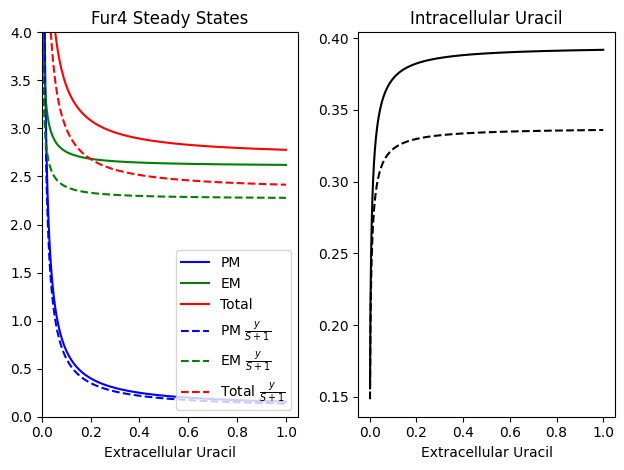

In [158]:
#Varying Extracellular Uracil
constant = 1000
S_es = np.linspace(0.001,1,constant)
fig,ax = plt.subplots(1,2)

#y, P_u->E, with Eisosome plotting
if True:
    S_steady = []
    P_steady = []
    P_e_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*k_2*y + A_e*W**2*a**2*f*k_2*y*z + 2*A_e*W**2*a*b*f*j*k_2*y + 2*A_e*W**2*a*f*j*k_2*y*z + A_e*W**2*b*f*j**2*k_2*y + A_e*W**2*f*j**2*k_2*y*z + A_p*S*W*a**2*k*k_2*y*z + A_p*S*W*a*j*k*k_2*y*z)/(A_p*S**2*a**2*k**2*k_1*z + A_p*S*S_e*W*a**2*k**2*k_1*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: y/z
    for S_extra in S_es:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra)) - V_m*S / (V*(K_m +S))
        root = opt.bisect(dSdt, 0.01, 10)
        S_steady.append(root)

        P_steady.append(P(      root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_e_steady.append(P_e(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_b_steady.append(P_b(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_u_steady.append(P_u(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_steady.append(E(      root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_b_steady.append(E_b(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_u_steady.append(E_u(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_e_steady = np.array(P_e_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_e_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    ax[0].plot(S_es,PM,'b',label = "PM")
    ax[0].plot(S_es,EM,'g',label = "EM")
    ax[0].plot(S_es,All,'r',label = "Total")
    ax[0].set_xlabel("Extracellular Uracil")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(S_es,S_steady,'k')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")


#y/(S+1), P_u->E, with Eisosome plotting
if True:
    S_steady = []
    P_steady = []
    P_e_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*k_2*y + A_e*W**2*a**2*f*k_2*y*z + 2*A_e*W**2*a*b*f*j*k_2*y + 2*A_e*W**2*a*f*j*k_2*y*z + A_e*W**2*b*f*j**2*k_2*y + A_e*W**2*f*j**2*k_2*y*z + A_p*S*W*a**2*k*k_2*y*z + A_p*S*W*a*j*k*k_2*y*z)/(A_p*S**3*a**2*k**2*k_1*z + A_p*S**2*S_e*W*a**2*k**2*k_1*z + A_p*S**2*a**2*k**2*k_1*z + A_p*S*S_e*W*a**2*k**2*k_1*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S**2*a*g*k*z + A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S**2*a*k*z + S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(S*a*z + a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: y/(S*z + z)
    for S_extra in S_es:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra)) - V_m*S / (V*(K_m +S))
        root = opt.bisect(dSdt, 0.01, 10)
        S_steady.append(root)

        P_steady.append(P(      root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_e_steady.append(P_e(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_b_steady.append(P_b(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        P_u_steady.append(P_u(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_steady.append(E(      root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_b_steady.append(E_b(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))
        E_u_steady.append(E_u(  root,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_extra))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_e_steady = np.array(P_e_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_e_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    ax[0].plot(S_es,PM,'b--',label = r"PM $\frac{y}{S+1}$")
    ax[0].plot(S_es,EM,'g--',label = r"EM $\frac{y}{S+1}$")
    ax[0].plot(S_es,All,'r--',label = r"Total $\frac{y}{S+1}$")
    ax[0].set_xlabel("Extracellular Uracil")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(S_es,S_steady,'k--')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")



plt.tight_layout()
plt.show()

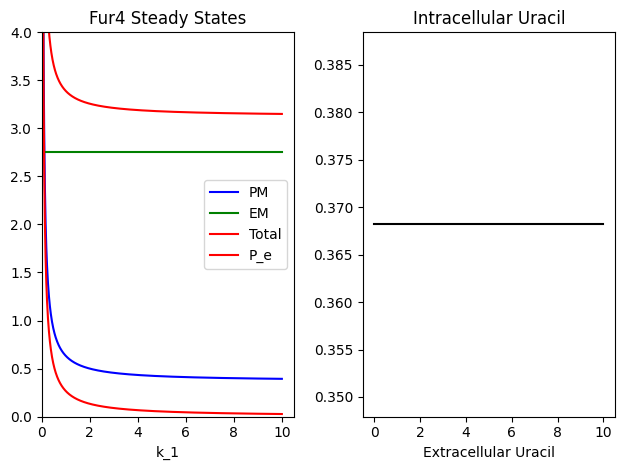

In [146]:
#Varying k1
constant = 1000
k1s = np.linspace(0.0001,10,constant)
fig,ax = plt.subplots(1,2)

#y/S, P_u->E, with Eisosome plotting
if True:
    S_steady = []
    P_steady = []
    P_e_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*k_2*y + A_e*W**2*a**2*f*k_2*y*z + 2*A_e*W**2*a*b*f*j*k_2*y + 2*A_e*W**2*a*f*j*k_2*y*z + A_e*W**2*b*f*j**2*k_2*y + A_e*W**2*f*j**2*k_2*y*z + A_p*S*W*a**2*k*k_2*y*z + A_p*S*W*a*j*k*k_2*y*z)/(A_p*S**2*a**2*k**2*k_1*z + A_p*S*S_e*W*a**2*k**2*k_1*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: y/z
    for k1_new in k1s:

        # bisect_S(P, P_b, P_u, E, E_b, E_u)
        dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e)) - V_m*S / (V*(K_m +S))
        root = opt.bisect(dSdt, 0.01, 10)
        S_steady.append(root)

        P_steady.append(P(      root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        P_e_steady.append(P_e(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        P_b_steady.append(P_b(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        P_u_steady.append(P_u(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        E_steady.append(E(      root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        E_b_steady.append(E_b(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))
        E_u_steady.append(E_u(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k_2,V_m,V,W,y,z,f,A_e,g,S_e))

    S_steady = np.array(S_steady)
    P_steady = np.array(P_steady)
    P_e_steady = np.array(P_e_steady)
    P_b_steady = np.array(P_b_steady)
    P_u_steady = np.array(P_u_steady)
    E_steady = np.array(E_steady)
    E_b_steady = np.array(E_b_steady)
    E_u_steady = np.array(E_u_steady)



    # Plotting

    PM = P_steady + P_e_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    ax[0].plot(k1s,PM,'b',label = "PM")
    ax[0].plot(k1s,EM,'g',label = "EM")
    ax[0].plot(k1s,All,'r',label = "Total")
    ax[0].plot(k1s,P_e_steady,'r',label = "P_e")
    ax[0].set_xlabel("k_1")
    ax[0].set_title("Fur4 Steady States")
    ax[0].legend()
    ax[0].axis(ymin=0,ymax=4,xmin=0)

    ax[1].plot(k1s,S_steady,'k')
    ax[1].set_title("Intracellular Uracil")
    ax[1].set_xlabel("Extracellular Uracil")




plt.tight_layout()
plt.show()

In [147]:
#Varying k1 and k2
constant = 100
k1s = np.linspace(0.1,10,constant)
k2s = np.linspace(0.001,10,constant)
K1s, K2s = np.meshgrid(k1s,k2s)
# fig,ax = plt.subplots(2,2)

#y/S, P_u->E, with Eisosome plotting
if True:
    S_steady = []
    P_steady = []
    P_e_steady = []
    P_b_steady = []
    P_u_steady = []
    E_steady = []
    E_b_steady = []
    E_u_steady = []
    #Steady State Equations
    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*k_2*y + A_e*W**2*a**2*f*k_2*y*z + 2*A_e*W**2*a*b*f*j*k_2*y + 2*A_e*W**2*a*f*j*k_2*y*z + A_e*W**2*b*f*j**2*k_2*y + A_e*W**2*f*j**2*k_2*y*z + A_p*S*W*a**2*k*k_2*y*z + A_p*S*W*a*j*k*k_2*y*z)/(A_p*S**2*a**2*k**2*k_1*z + A_p*S*S_e*W*a**2*k**2*k_1*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_p**2*S*a*g*k*z)
    E   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (W*a*b*y + W*a*y*z + W*b*j*y + W*j*y*z)/(S*a*k*z)
    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (b*y + y*z)/(a*z)
    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: y/z
    for i in range(constant):
        if i%(constant//20) == 0:
            display.clear_output()
            print(f"{i}/{constant}")
        for j in range(constant):
            k1_new = K1s[i,j]
            k2_new = K2s[i,j]

            # bisect_S(P, P_b, P_u, E, E_b, E_u)
            dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e)) - V_m*S / (V*(K_m +S))
            root = opt.bisect(dSdt, 0.0001, 10)
            S_steady.append(root)

            P_steady.append(P(      root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            P_e_steady.append(P_e(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            P_b_steady.append(P_b(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            P_u_steady.append(P_u(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            E_steady.append(E(      root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            E_b_steady.append(E_b(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
            E_u_steady.append(E_u(  root,a,b,A_p,j,K_d,K_m,k,k1_new,k2_new,V_m,V,W,y,z,f,A_e,g,S_e))
    display.clear_output()
    print(f"{constant}/{constant}")
    S_steady = np.array(S_steady).reshape((constant,constant))
    P_steady = np.array(P_steady).reshape((constant,constant))
    P_e_steady = np.array(P_e_steady).reshape((constant,constant))
    P_b_steady = np.array(P_b_steady).reshape((constant,constant))
    P_u_steady = np.array(P_u_steady).reshape((constant,constant))
    E_steady = np.array(E_steady).reshape((constant,constant))
    E_b_steady = np.array(E_b_steady).reshape((constant,constant))
    E_u_steady = np.array(E_u_steady).reshape((constant,constant))



    # Plotting

    PM = P_steady + P_e_steady + P_b_steady + P_u_steady
    EM = E_steady + E_b_steady + E_u_steady
    All = PM+EM

    





100/100


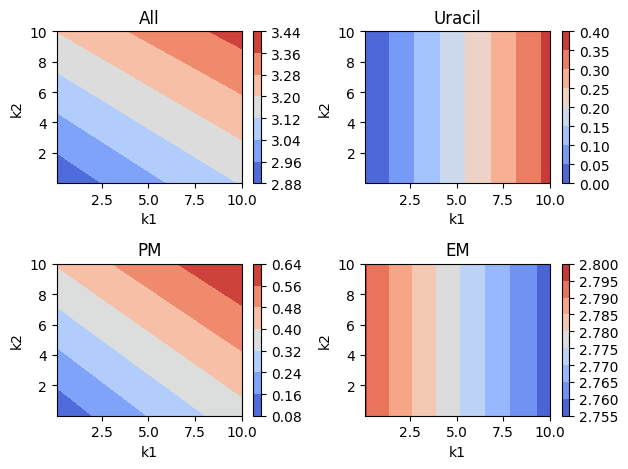

In [148]:
fig, ax = plt.subplots(2,2)


graph = ax[0,0].contourf(K1s,K2s,All,cmap=cm.coolwarm)
ax[0,0].set_xlabel("k1")
ax[0,0].set_ylabel("k2")
ax[0,0].set_title("All")
fig.colorbar(graph,cmap=cm.coolwarm)


graph = ax[0,1].contourf(K1s,K2s,S_steady,cmap=cm.coolwarm)
ax[0,1].set_xlabel("k1")
ax[0,1].set_ylabel("k2")
ax[0,1].set_title("Uracil")
fig.colorbar(graph,cmap=cm.coolwarm)


graph = ax[1,0].contourf(K1s,K2s,PM,cmap=cm.coolwarm)
ax[1,0].set_xlabel("k1")
ax[1,0].set_ylabel("k2")
ax[1,0].set_title("PM")
fig.colorbar(graph,cmap=cm.coolwarm)


graph = ax[1,1].contourf(K1s,K2s,EM,cmap=cm.coolwarm)
ax[1,1].set_xlabel("k1")
ax[1,1].set_ylabel("k2")
ax[1,1].set_title("EM")
fig.colorbar(graph,cmap=cm.coolwarm)

plt.tight_layout()
plt.show()

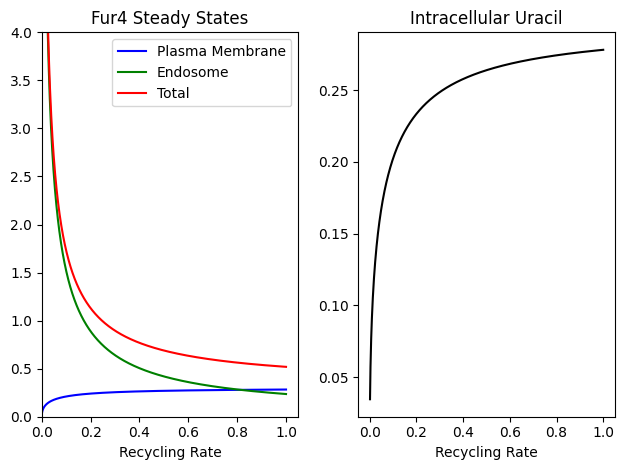

In [36]:
#Varying Recycling Rate
constant = 1000
fs = np.linspace(0.001,1,constant)

S_steady = []
P_steady = []
P_b_steady = []
P_u_steady = []
E_steady = []
E_b_steady = []
E_u_steady = []
#Steady State Equations
P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_e*S*W*a**2*f*k*z + A_e*S*W*a*f*j*k*z + A_e*S_e*W**2*a**2*f*k*z + A_e*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_e*W*a**2*f*z + A_e*W*a*f*j*z + A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_e*A_p*W*a*f*g*z + A_e*A_p*W*f*g*j*z + A_p**2*S**2*a*g*k*z + A_p**2*S*a*g*k*z)
E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: A_p*S*b*k*y/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/(S*z + z)
for f_new in fs:

    # bisect_S(P, P_b, P_u, E, E_b, E_u)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e)) - V_m*S / (V*(K_m +S))
    root = opt.bisect(dSdt, 0.01, 10)
    S_steady.append(root)

    P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))
    E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f_new,A_e,g,S_e))

S_steady = np.array(S_steady)
P_steady = np.array(P_steady)
P_b_steady = np.array(P_b_steady)
P_u_steady = np.array(P_u_steady)
E_steady = np.array(E_steady)
E_b_steady = np.array(E_b_steady)
E_u_steady = np.array(E_u_steady)


# Plotting

PM = P_steady + P_b_steady + P_u_steady
EM = E_steady + E_b_steady + E_u_steady
All = PM+EM

fig,ax = plt.subplots(1,2)
ax[0].plot(S_es,PM,'b',label = "Plasma Membrane")
ax[0].plot(S_es,EM,'g',label = "Endosome")
ax[0].plot(S_es,All,'r',label = "Total")
ax[0].set_xlabel("Recycling Rate")
ax[0].set_title("Fur4 Steady States")
ax[0].legend()
ax[0].axis(ymin=0,ymax=4,xmin=0)

ax[1].plot(S_es,S_steady,'k')
ax[1].set_title("Intracellular Uracil")
ax[1].set_xlabel("Recycling Rate")

plt.tight_layout()
plt.show()


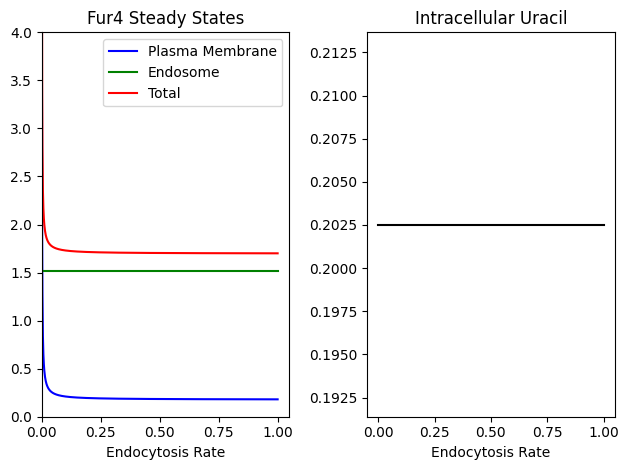

In [37]:
#Varying Endocytosis Rate
constant = 1000
gs = np.linspace(0.001,1,constant)

S_steady = []
P_steady = []
P_b_steady = []
P_u_steady = []
E_steady = []
E_b_steady = []
E_u_steady = []
#Steady State Equations
P   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_e*S*W*a**2*f*k*z + A_e*S*W*a*f*j*k*z + A_e*S_e*W**2*a**2*f*k*z + A_e*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
P_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_e*W*a**2*f*z + A_e*W*a*f*j*z + A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
P_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_e*A_p*W*a*f*g*z + A_e*A_p*W*f*g*j*z + A_p**2*S**2*a*g*k*z + A_p**2*S*a*g*k*z)
E   = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_b = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: A_p*S*b*k*y/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_e*W*a*f*z + A_e*W*f*j*z + A_p*S**2*a*k*z + A_p*S*a*k*z)
E_u = lambda S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g,S_e: y/(S*z + z)
for g_new in fs:

    # bisect_S(P, P_b, P_u, E, E_b, E_u)
    dSdt = lambda S: -(k/W)*S*((A_p/V)*P(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e) + (A_e/V)*E(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e)) + (j+a)*((A_p/V)*P_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e) + (A_e/V)*E_b(S,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e)) - V_m*S / (V*(K_m +S))
    root = opt.bisect(dSdt, 0.1, 10)
    S_steady.append(root)

    P_steady.append(P(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    P_b_steady.append(P_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    P_u_steady.append(P_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_steady.append(E(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_b_steady.append(E_b(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))
    E_u_steady.append(E_u(root,a,b,A_p,j,K_d,K_m,k,V_m,V,W,y,z,f,A_e,g_new,S_e))

S_steady = np.array(S_steady)
P_steady = np.array(P_steady)
P_b_steady = np.array(P_b_steady)
P_u_steady = np.array(P_u_steady)
E_steady = np.array(E_steady)
E_b_steady = np.array(E_b_steady)
E_u_steady = np.array(E_u_steady)


# Plotting

PM = P_steady + P_b_steady + P_u_steady
EM = E_steady + E_b_steady + E_u_steady
All = PM+EM

fig,ax = plt.subplots(1,2)
ax[0].plot(S_es,PM,'b',label = "Plasma Membrane")
ax[0].plot(S_es,EM,'g',label = "Endosome")
ax[0].plot(S_es,All,'r',label = "Total")
ax[0].set_xlabel("Endocytosis Rate")
ax[0].set_title("Fur4 Steady States")
ax[0].legend()
ax[0].axis(ymin=0,ymax=4,xmin=0)

ax[1].plot(S_es,S_steady,'k')
ax[1].set_title("Intracellular Uracil")
ax[1].set_xlabel("Endocytosis Rate")

plt.tight_layout()
plt.show()
